pandas: Library for data manipulation and analysis, particularly useful for handling structured data.

numpy: Library for numerical computing in Python, providing support for arrays and matrices.

matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations in Python.

tensorflow: An end-to-end open-source platform for machine learning.

keras: A high-level neural networks API running on top of TensorFlow.

RMSprop, Adam: Optimization algorithms used for training machine learning models.

sklearn.metrics: Provides functions to compute various evaluation metrics for models, including confusion matrix and classification report.

warnings: A standard library to manage warnings in Python, here used to ignore warnings.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Sequential: A linear stack of layers for building a neural network model.

Conv2D, Dense, Dropout, Flatten: Types of layers for constructing the neural network.

load_data(): Loads the CIFAR-10 dataset, consisting of 60,000 32x32 color images in 10 classes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam


In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print('Numer of Training Samples:')
print(f'Number of X Traing samples are : {x_train.shape[0]} ')
print(f'Number of Y Traing samples are : {y_train.shape[0]} ')
print('=====================================================')
print('Number of Test Samples: ')
print(f'Number of X test are : {x_test.shape[0]}')
print(f'Number of Y test are : {y_test.shape[0]} ')

Numer of Training Samples:
Number of X Traing samples are : 50000 
Number of Y Traing samples are : 50000 
Number of Test Samples: 
Number of X test are : 10000
Number of Y test are : 10000 


In [ ]:
print(f'Size of Images is : {len(x_train[1])}x{len(x_train[2])}')

Size of Images is : 32x32


In [ ]:
print(f'Number of color channels in training dataset are : {x_train.shape[3]} ')

print('=====================================================')

print(f'Number of color channels in test data sets are : {x_test.shape[3]}')


Number of color channels in training dataset are : 3 
Number of color channels in test data sets are : 3


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
def plot_samples(X,y,index):
  plt.figure(figsize=(12,2)) #controlled image size
  plt.imshow(X[index]) #to show image
  plt.xlabel(classes[y[index]])     #checking image class

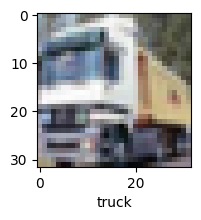

In [ ]:
plot_samples(x_train,y_train,1) #function created to see image and class label as well (you can change index to see different image with label)

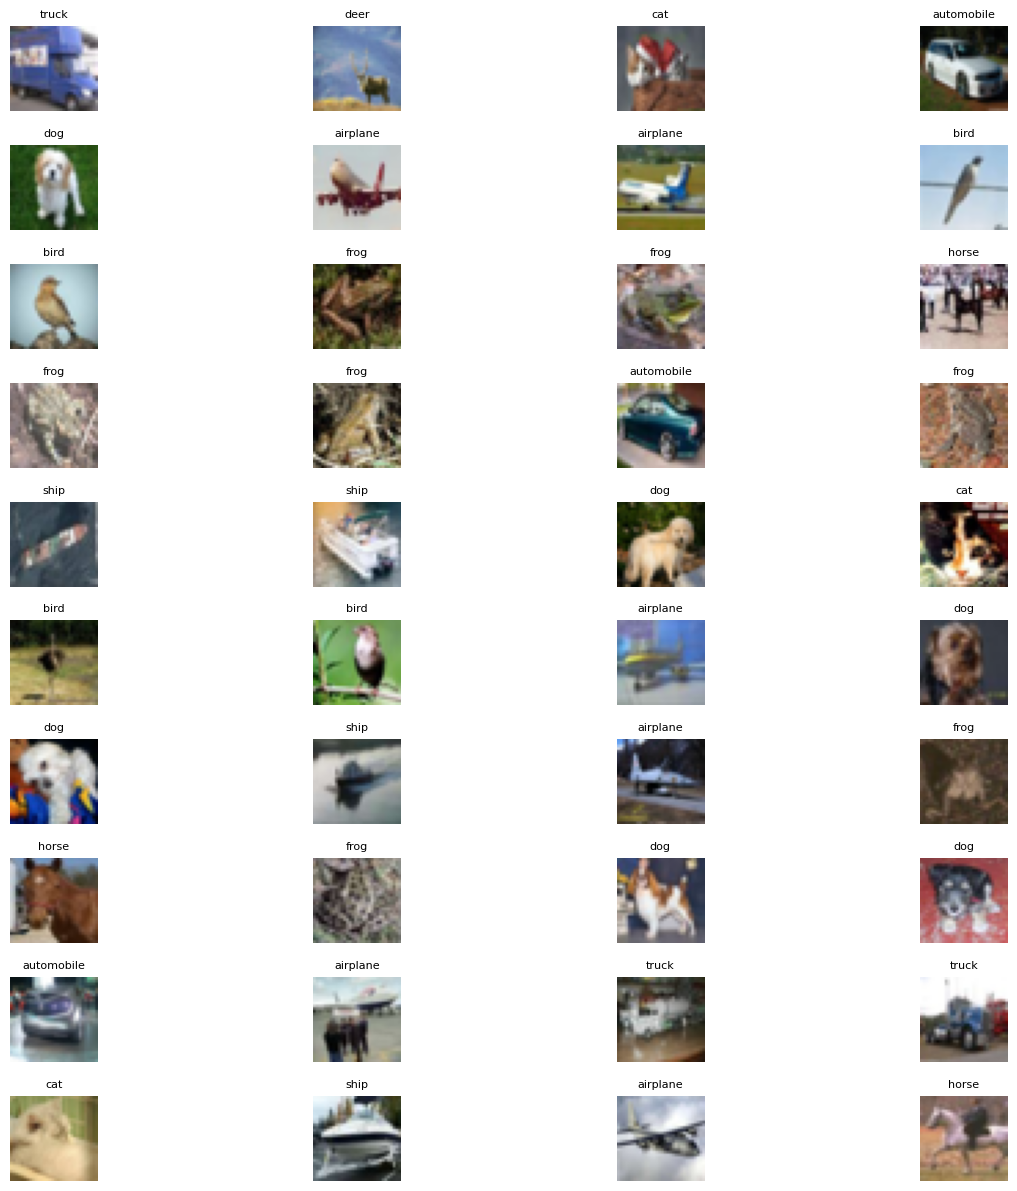

In [ ]:
W_grid = 4
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
#

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(f'Number of samples for {classes[0]} class are : {np.count_nonzero(x_train[0]) + np.count_nonzero(x_test[0])}')
print(f'Number of samples for {classes[1]} class are : {np.count_nonzero(x_train[1]) + np.count_nonzero(x_test[1])}')
print(f'Number of samples for {classes[2]} class are : {np.count_nonzero(x_train[2]) + np.count_nonzero(x_test[2])}')
print(f'Number of samples for {classes[3]} class are : {np.count_nonzero(x_train[3]) + np.count_nonzero(x_test[3])}')
print(f'Number of samples for {classes[4]} class are : {np.count_nonzero(x_train[4]) + np.count_nonzero(x_test[4])}')
print(f'Number of samples for {classes[5]} class are : {np.count_nonzero(x_train[5]) + np.count_nonzero(x_test[5])}')
print(f'Number of samples for {classes[6]} class are : {np.count_nonzero(x_train[6]) + np.count_nonzero(x_test[6])}')
print(f'Number of samples for {classes[7]} class are : {np.count_nonzero(x_train[7]) + np.count_nonzero(x_test[7])}')
print(f'Number of samples for {classes[8]} class are : {np.count_nonzero(x_train[8]) + np.count_nonzero(x_test[8])}')
print(f'Number of samples for {classes[9]} class are : {np.count_nonzero(x_train[9]) + np.count_nonzero(x_test[9])}')


Number of samples for airplane class are : 6137
Number of samples for automobile class are : 6108
Number of samples for bird class are : 6144
Number of samples for cat class are : 6144
Number of samples for deer class are : 6133
Number of samples for dog class are : 6142
Number of samples for frog class are : 6139
Number of samples for horse class are : 6144
Number of samples for ship class are : 6144
Number of samples for truck class are : 6144


In [ ]:
print(f'Number of samples in training dataset for {classes[0]} class are : {np.count_nonzero(x_train[0])}')
print(f'Number of samples in training dataset for {classes[1]} class are : {np.count_nonzero(x_train[1])}')
print(f'Number of samples in training dataset for {classes[2]} class are : {np.count_nonzero(x_train[2])}')
print(f'Number of samples in training dataset for {classes[3]} class are : {np.count_nonzero(x_train[3])}')
print(f'Number of samples in training dataset for {classes[4]} class are : {np.count_nonzero(x_train[4])}')
print(f'Number of samples in training dataset for {classes[5]} class are : {np.count_nonzero(x_train[5])}')
print(f'Number of samples in training dataset for {classes[6]} class are : {np.count_nonzero(x_train[6])}')
print(f'Number of samples in training dataset for {classes[7]} class are : {np.count_nonzero(x_train[7])}')
print(f'Number of samples in training dataset for {classes[8]} class are : {np.count_nonzero(x_train[8])}')
print(f'Number of samples in training dataset for {classes[9]} class are : {np.count_nonzero(x_train[9])}')

Number of samples in training dataset for airplane class are : 3065
Number of samples in training dataset for automobile class are : 3072
Number of samples in training dataset for bird class are : 3072
Number of samples in training dataset for cat class are : 3072
Number of samples in training dataset for deer class are : 3061
Number of samples in training dataset for dog class are : 3071
Number of samples in training dataset for frog class are : 3072
Number of samples in training dataset for horse class are : 3072
Number of samples in training dataset for ship class are : 3072
Number of samples in training dataset for truck class are : 3072


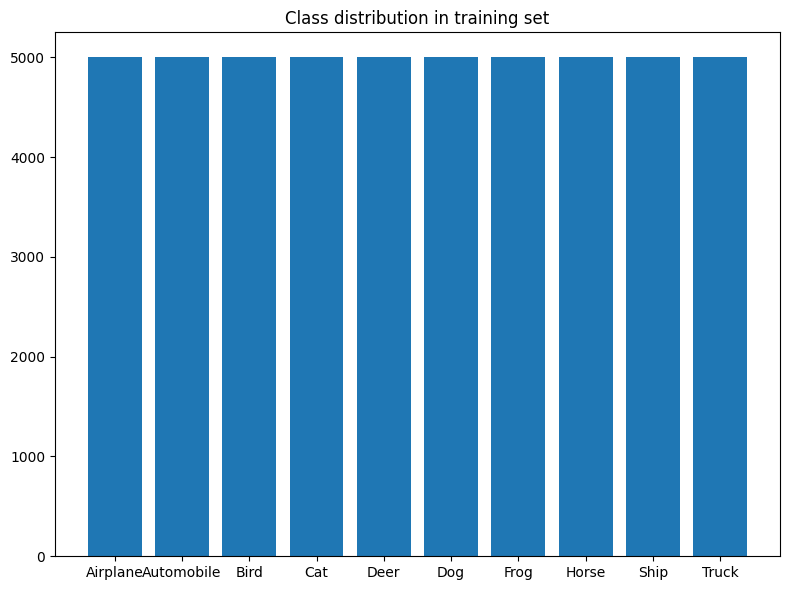

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
import seaborn as sns
classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,6))
plt.bar(classes_name, counts)
plt.title('Class distribution in training set')
plt.tight_layout()
plt.show()

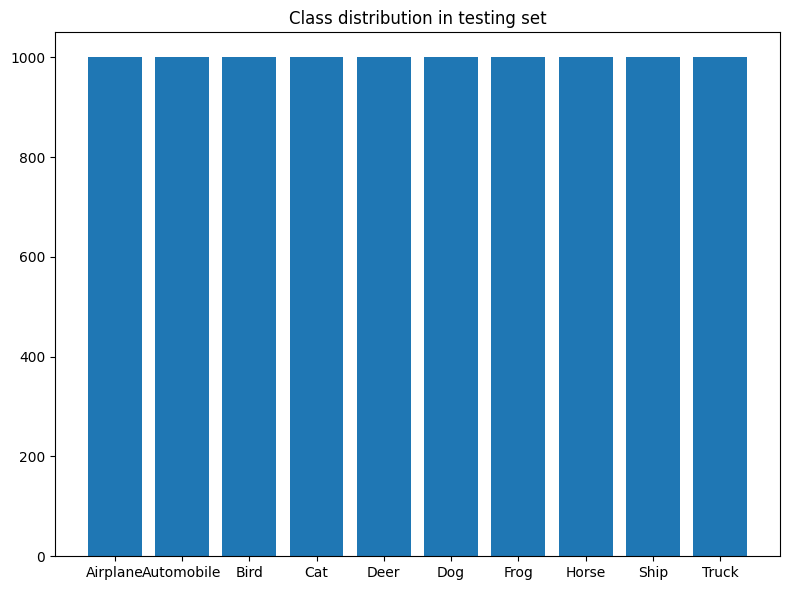

In [ ]:
plt.figure(figsize=(8,6))
classes, counts = np.unique(y_test, return_counts=True)
plt.bar(classes_name,counts)
plt.title('Class distribution in testing set')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

 An AlexNet model is constructed using Sequential() from Keras, featuring multiple convolutional layers (Conv2D), activation functions (ReLU), max-pooling layers (MaxPooling2D), and fully connected layers (Dense). The model is designed to take 227x227x3 input images and produce class probabilities through a softmax output layer.

 First Convolutional Layer:

Conv2D with 96 filters, 11x11 kernel, stride of 4, valid padding.
ReLU activation.
MaxPooling2D with 3x3 pool size and stride of 2.
Second Convolutional Layer:

Conv2D with 256 filters, 5x5 kernel, same padding.
ReLU activation.
MaxPooling2D.
Third Convolutional Layer:

Conv2D with 384 filters, 3x3 kernel, same padding.
ReLU activation.
Fourth Convolutional Layer:

Another Conv2D with 384 filters, 3x3 kernel, same padding.
ReLU activation.
Fifth Convolutional Layer:

Conv2D with 256 filters, 3x3 kernel, same padding.
ReLU activation.
MaxPooling2D.
Flatten Layer: Converts 3D output to 1D vector.

Fully Connected Layers:

Two Dense layers with 4096 units each and ReLU activation.
Output Layer:

Dense layer with 1000 units (for classes) and softmax activation.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam

# Define the AlexNet architecture
model = Sequential([
    # First Convolutional Layer
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid', input_shape=(227, 227, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

    # Second Convolutional Layer
    Conv2D(filters=256, kernel_size=(5, 5), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

    # Third Convolutional Layer
    Conv2D(filters=384, kernel_size=(3, 3), padding='same'),
    Activation('relu'),

    # Fourth Convolutional Layer
    Conv2D(filters=384, kernel_size=(3, 3), padding='same'),
    Activation('relu'),

    # Fifth Convolutional Layer
    Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

    # Flatten
    Flatten(),

    # Fully Connected Layers
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),

    # Output Layer
    Dense(1000, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

Trains the model on the training dataset for 100 epochs and validates on the test dataset.

In [ ]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1058 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 2.3000
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1350 - loss: 2.2980 - val_accuracy: 0.1787 - val_loss: 2.2727
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1799 - loss: 2.2156 - val_accuracy: 0.1988 - val_loss: 2.0671
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2049 - loss: 2.0411 - val_accuracy: 0.2358 - val_loss: 1.9553
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2212 - loss: 1.9774 - val_accuracy: 0.2513 - val_loss: 1.9078
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2634 - loss: 1.8811 - val_accuracy: 0.2858 - val_loss: 1.9001
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3186 - loss: 1.7511 - val_accuracy: 0.3567 - val_loss: 1.6722
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3513 - loss:

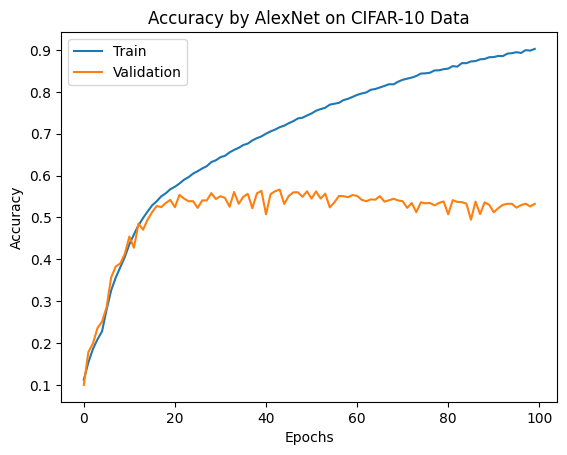

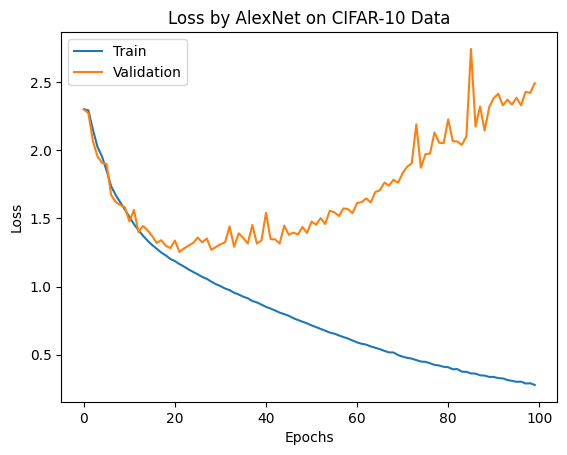

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[607,  54,  76,  26,  21,  13,  26,  32,  93,  52],
       [ 40, 704,   9,  20,   3,  12,  31,  22,  34, 125],
       [ 86,  15, 373,  75, 124, 101, 117,  75,  19,  15],
       [ 42,  29,  68, 325,  66, 212, 144,  73,  14,  27],
       [ 32,   8, 101,  60, 429,  65, 161, 126,  14,   4],
       [ 22,  17,  78, 192,  73, 408,  82, 102,  13,  13],
       [  6,  23,  51,  75,  73,  52, 677,  22,   3,  18],
       [ 36,  29,  45,  42,  79,  86,  38, 616,   2,  27],
       [111,  88,  17,  29,  16,  17,  13,  10, 644,  55],
       [ 63, 221,  18,  24,   8,  19,  23,  40,  43, 541]])

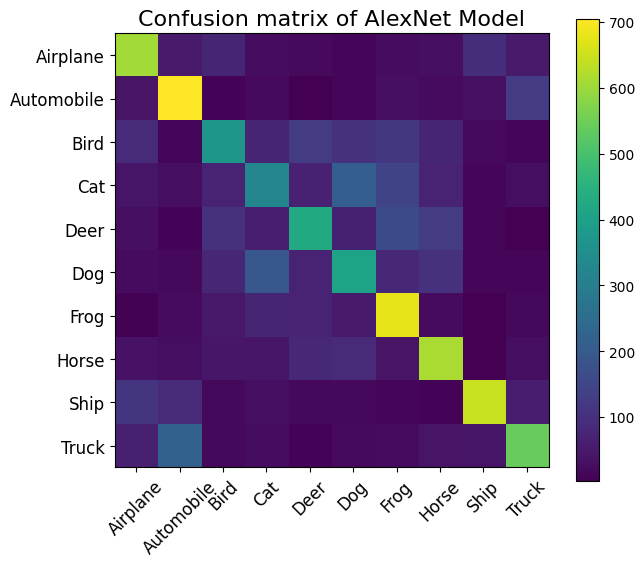

In [ ]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy by AlexNet:",(y_test, y_predictions1))

Test accuracy by AlexNet: (array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 1, 8, ..., 2, 3, 7]))


 Making Predictions and Evaluating the Model

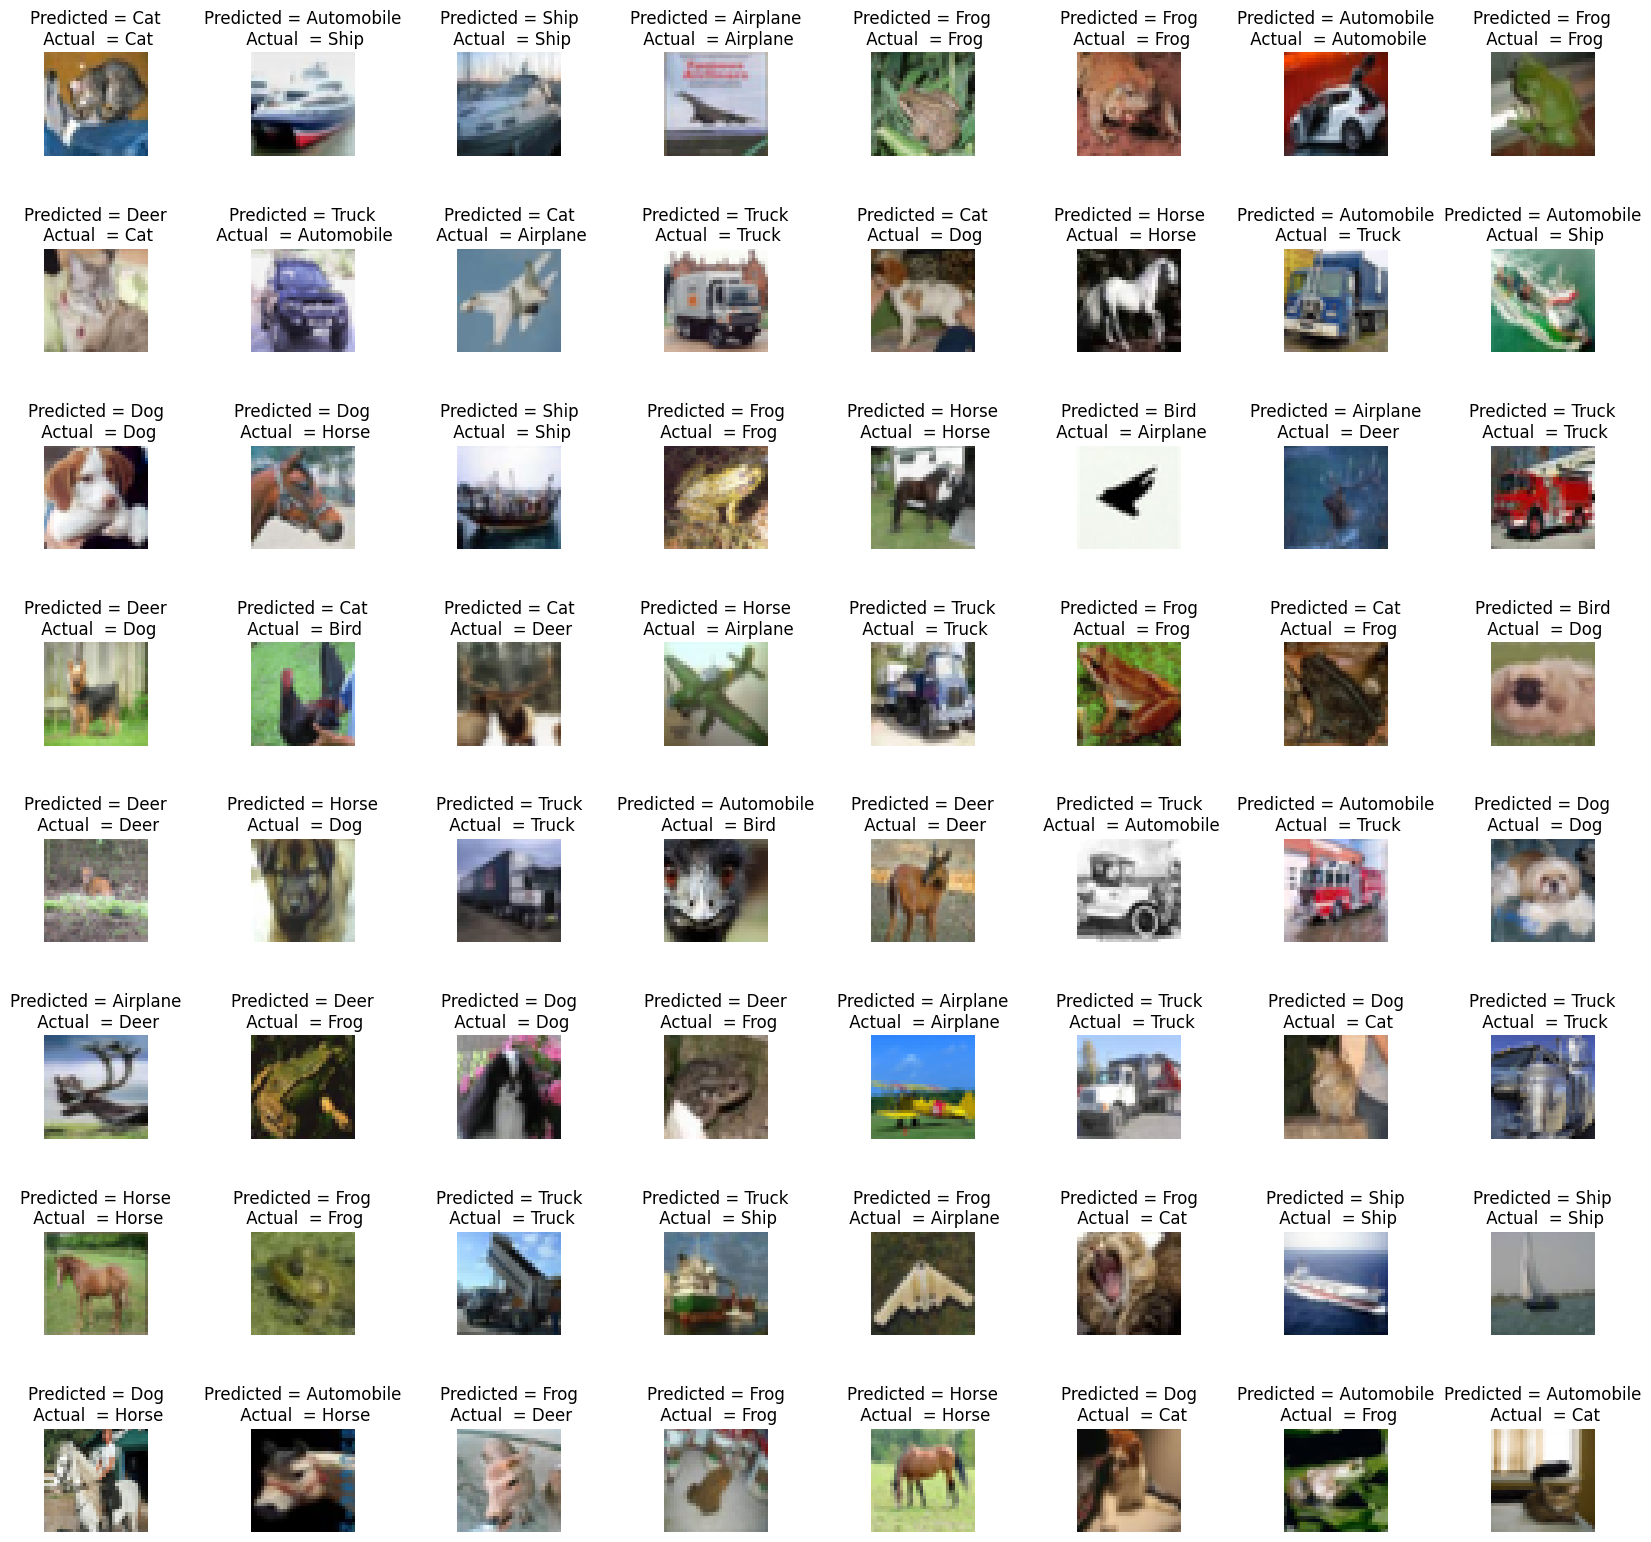

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes_name[y_predictions1[i]], classes_name[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)